# Журавлев Алексей, 323 группа 
## Вариант 3

###  Постановка задачи
Используя метод переменных направлений, решить краевую задачу:

$$\begin{equation}
 \left\{
\begin{aligned}
& \frac{\partial u}{\partial t} = \Delta u, 0<x<\pi, 0<y<2\pi, t>0\\
& u\big|_{x=0}=u\big|_{x=\pi}=0\\
& \frac{\partial u}{\partial y}\big|_{y=0}=\frac{\partial u}{\partial y}\big|_{y=2\pi}=0\\
& u\big|_{t=0}=sin(3x)cos(y)
\end{aligned} \right. \label{eq1}
\end{equation} $$

### Аналитическое решение 

Ищем решение в следующем виде:

$$u(x,y,t)=T(t)V(x,y)$$

Разделяя переменные, получим:

$$\frac{T'(t)}{T(t)}=\frac{V"(x,y)}{V(x,y)}=-\lambda$$

Получили задачу Коши и задачу Штурма-Лиувилля:

$$ \left\{
\begin{aligned}
& T'+\lambda T = 0\\
& T(0)=0
\end{aligned} \right. \label{eq2} \hspace{20pt} \left\{
\begin{aligned}
& V'' +\lambda V = 0\\
& V\big|_{x=0}=V\big|_{x=\pi}=0\\
& \frac{\partial V}{\partial y}\big|_{y=0}=\frac{\partial V}{\partial y}\big|_{y=2\pi}=0
\end{aligned} \right. \label{eq3} $$

Представляя функцию $V$ в виде $V(x,y)=X(x)Y(y)$ и используя разделение переменных, получаем две задачи Штурма-Лиувилля на отрезке:

 $$  \left\{
\begin{aligned}
& X''+\nu X = 0\\
& X \big|_{x=0}= X \big|_{x=\pi}\\
\end{aligned} \right.   \Rightarrow X=sin(\sqrt{\nu} x) \hspace{20pt} \left\{
\begin{aligned}
& Y''+\mu Y = 0\\
&  \frac{\partial Y}{\partial y}\big|_{y=0}=\frac{\partial Y}{\partial y}\big|_{y=2\pi}=0
\end{aligned} \right. \Rightarrow Y=cos(\sqrt{\mu} y) $$

где  $ \mu =\big{(} \frac{m}{2}\big{)} ^{2}$, $ \nu = n ^{2}$, $\lambda=\mu+\nu$

Для функции $V$: $V_{nm}=cos(\frac{my}{2})sin(nx)$

Из начальных условий следует, что $ n=3, m=2 \Rightarrow \lambda =10 $

Так решение представляется в виде

$$V= \sum\limits_{n=0}^\infty \sum\limits_{m=1}^\infty V_{nm}(x,y) T_{nm}(t) $$

Находим аналитическое решение: $$u(x,y,t)=sin(3x)cos(y)e^{-10t}$$

### График аналитического решения

<IPython.core.display.Javascript object>


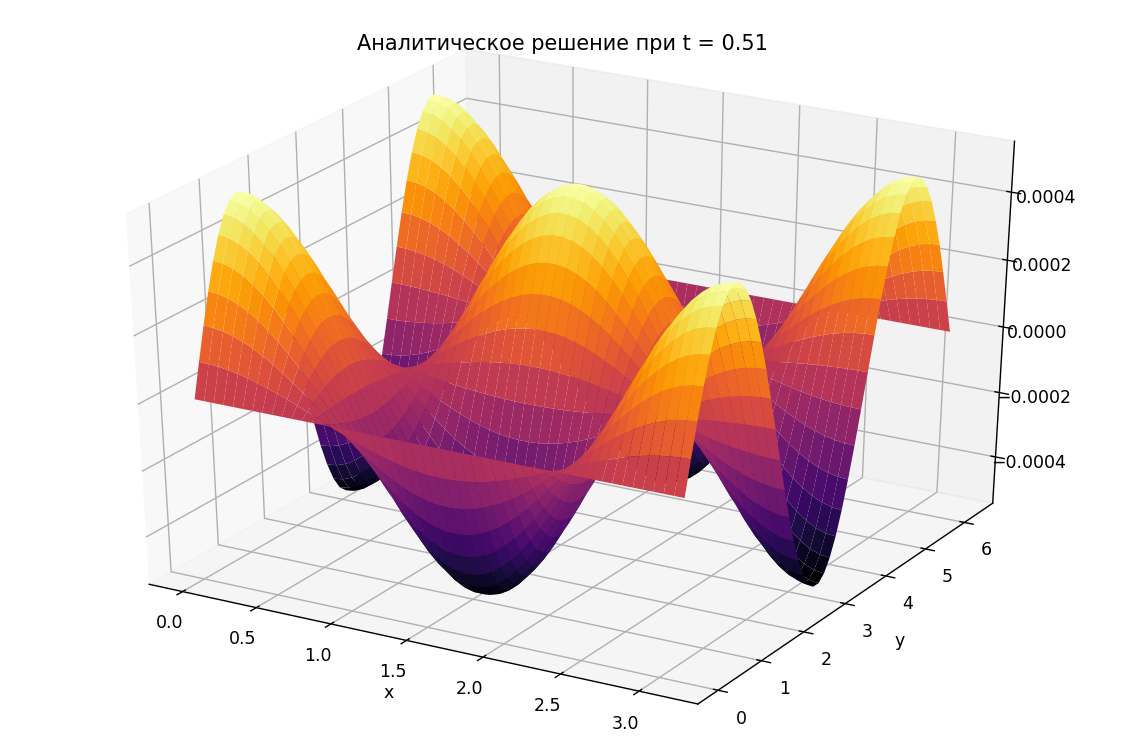

Text(0.5, 0.92, 'Аналитическое решение при t = 0.51')

In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from math import*
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

N, M, T = 50, 50, 50
x_start, x_end = 0, pi
y_start, y_end = 0, 2*pi
t_start, t_end = 0, 1
tau= t_end/ (T-1)
x = np.linspace(x_start,x_end,N)
y = np.linspace(y_start,y_end,M) 
t = np.linspace(t_start,t_end,T)

u_a = np.zeros((N,M,T))
for n in range(0,N):              
    for m in range(0,M):
        for j in range(0,T):
            u_a[n,m,j]=sin(3*x[n])*cos(y[m])*exp(-10*j*tau)
            
fig = plt.figure(figsize=(9,6))
ax = Axes3D(fig)
x1,y1 = np.meshgrid(x,y)
ax.plot_surface(x1, y1, u_a[:,:,int(1.5*T/2)], cmap=cm.inferno)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Аналитическое решение при t = ' +str(round(tau*T/2,2)) + '')

<IPython.core.display.Javascript object>


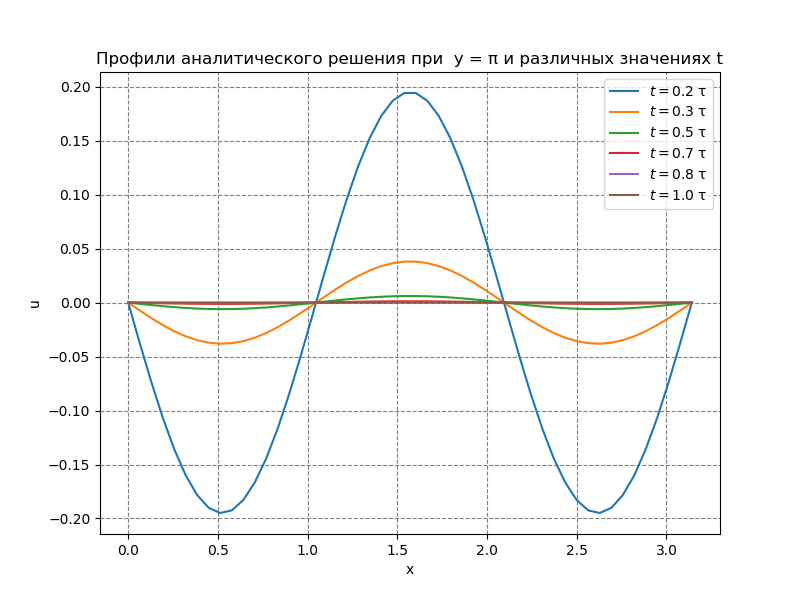

Text(0.5, 1.0, 'Профили аналитического решения при  y = π и различных значениях t')

In [46]:
fig,ax=plt.subplots(figsize=(8,6))
x = np.linspace(x_start,x_end,N)
plt.xlabel('x')
plt.ylabel('u')

plt.plot(x, u_a[:,M//2,int(T/6)],label='$t=$' +str(round(tau*T/6,1)) + ' τ')
plt.plot(x, u_a[:,M//2,int(2*T/6)],label='$t= $' +str(round(tau*2*T/6,1)) + ' τ')
plt.plot(x, u_a[:,M//2,int(3*T/6)],label='$t= $' +str(round(tau*3*T/6,1)) + ' τ')
plt.plot(x, u_a[:,M//2,int(4*T/6)],label='$t= $' +str(round(tau*4*T/6,1)) + ' τ')
plt.plot(x, u_a[:,M//2,int(5*T/6)],label='$t= $' +str(round(tau*5*T/6,1)) + ' τ')
plt.plot(x, u_a[:,M//2,int(6*T/6)-1],label='$t= $' +str(round(tau*6*T/6,1)) + ' τ')
ax.grid(which='major', color = 'gray',ls='--')
ax.legend(loc='best')
plt.title("Профили аналитического решения при  y = π и различных значениях t")

## Численное решение

###  Схема переменных направлений

Введем в рассчетной области двумерную пространственную и одномерную временную сетку:

$$  \left. 
\begin{aligned}
& x_{n}=nh_{x}, n=\overline{0,N-1}, Nh_{x}=\pi \\
&  y_{m}=-\frac{h_{y}}{2}+mh_{y}, m=\overline{0,M-1}, Mh_{y}=2\pi\\
&  t_{j}=j\tau, j=\overline{0,J-1}, J\tau=T\\
\end{aligned} \right. $$

где $h_{x}$, $h_{y}$ и $\tau $ - шаги по координатам $x$,$y$ и $t$.
Так как по переменной $y$ мы имеем условия Неймана на обоих границах, будем  рассматривать фиктивные узлы в окрестности этих границ.

Заменим дифференциальные операторы $\dfrac{\partial^2 }{\partial x^2}$ и $\dfrac{\partial^2 }{\partial y^2}$ их разностными аналогами:

$$  \left. 
\begin{aligned}
&  \Lambda_{1}u=\frac{u_{n-1,m}-2u_{n,m}+u_{n+1,m}}{h_{x}^{2}}\\
&  \Lambda_{2}u=\frac{u_{n,m-1}-2u_{n,m}+u_{n,m+1}}{h_{y}^{2}}
\end{aligned} \right. $$

Здесь $u_{n,m}=u(x_{n},y_{m},t_{j})$. Решение разностной задачи будем обозначать функцией $\omega$.
 
В итоге, получили переход от дифференциальной задачи к разностной:

$$ L\omega \rightarrow \Lambda_{1}\omega +\Lambda_{2}\omega $$
 
 Для решения  задачи введем полуцелые слои, каждый из которых расположен между целыми значениями $j$ $j+1$. Расстояния между целыми и полуцелыми слоями равны $\frac{\tau}{2}$.
 
Будем рассматривать схему переменных направлений, являющейся объединением явной и неявной схемы. При переходе со слоя $j$ на $j+\frac{1}{2}$ будем использовать неявную схему по переменной $x$ и явную схему по переменной $y$. При переходе с полуцелого слоя $j+\frac{1}{2}$ на следующий целый слой $j+1$ будем пользоваться неявной схемой по переменной $y$ и явной по $x$.
 
Таким образом, получаем разностную задачу:

$$\begin{equation}
 \left\{
\begin{aligned}
&  \frac{\omega^{j+\frac{1}{2}}_{n,m}-\omega^{j}_{n,m}}{0.5 \tau}= \Lambda_{1}\omega^{j+1}_{n,m}+\Lambda_{2}\omega_{n,m}^{j+1} +f^{j+\frac{1}{2}}\\
&  \frac{\omega^{j+1}_{n,m}-\omega^{j+\frac{1}{2}}_{n,m}}{0.5 \tau}=\Lambda_{1}\omega^{j+1}_{n,m}+\Lambda_{2}\omega_{n,m}^{j+1} +f^{j+\frac{1}{2}}\\
\end{aligned} \right. \label{eq6}
\end{equation} $$

В силу отсутствия неоднородности в правой части исходной задачи $f=0$.

Рассматривая первое уравнение системы и добавляя к нему граничные условия по $x$, для каждого из фиксированных значений $y_{m}$ полученное уравнение можно решить методом прогонки.

Далее, зная значения функции на полуцелых слоях, дополним второе из уравнений системы граничными условиями по $y$ и аналогично первому случаю, решим для каждого из фиксированных значений $x_{n}$ систему методом прогонки.

Начальные условия задачи аппроксимируются точно:

$$ \omega^{0}_{n,m} = 0 , n= \overline{0,N}, m=\overline{0,M} $$

В силу однородности начальных условий в задаче, данные условия применимы и для полуцелых слоев.

Граничные условия аппроксимируются на каждом временном  слое $j$ следующим образом:

$$  \left. 
\begin{aligned}
&  \omega_{0,m}^{j}= \omega_{N,m}^{j} = 0 , m=\overline{0,M} \\
&  \frac{\omega^{j}_{n,1}-\omega^{j}_{n,0}}{h_{y}}=  \frac{\omega^{j}_{n,M}-\omega^{j}_{n,N-1}}{h_{y}}=0, n= \overline{0,N}
\end{aligned} \right. $$

При этом условия Дирихле аппроксимируются точно, а условия Неймана за счет выбора сетки аппроксимируются со вторым порядком погрешности аппроксимации, так как
соответствующие разностные первые производные оказываются центральными относительно точек $y = 0$ и $y = 2\pi$.

Переписывая операторы в явном виде, получаем:

$$\begin{equation}
 \left\{
\begin{aligned}
& 0.5 \gamma_{1} \omega^{j+0.5}_{n-1,m}-(1+\gamma_{1}) \omega^{j+0.5}_{n,m} + 0.5\gamma_{1} \omega^{j+0.5}_{n+1,m} = -\underbrace{\bigg{(}(1-\gamma_{2}) \omega^{j}_{n,m}+ 0.5\gamma_{2}(\omega^{j}_{n,m-1}+\omega^{j}_{n,m+1})\bigg{)}}_{F_{n}^{x}}, m=\overline{1,M-1} \\
& 0.5 \gamma_{2} \omega^{j+1}_{n,m-1}-(1+\gamma_{2}) \omega^{j+1}_{n,m} + 0.5\gamma_{2} \omega^{j+1}_{n,m+1} = -\underbrace{\bigg{(}(1-\gamma_{1}) \omega^{j+0.5}_{n,m}+ 0.5\gamma_{1}(\omega^{j+0.5}_{n-1,m}+\omega^{j+0.5}_{n+1,m})\bigg{)}}_{F_{m}^{y}}, n=\overline{1,N-1} \\
\end{aligned} \right. \label{eq7}
\end{equation}$$

Где $\gamma_{1} = \frac{\tau}{h_{x}}$, $\gamma_{2} = \frac{\tau}{h_{y}}$.

Если ввести коэффициенты $A_{x} = C_{X} = 0.5\gamma_{1}$, $B_{x}= 1-\gamma_{1}$ и  $A_{y} = C_{y} = 0.5\gamma_{2}$, $B_{y}= 1-\gamma_{2}$, То получим системы уравнений, которые можно решить методом прогонки.

### Метод прогонки

Метод прогонки основывается на решении линейных систем с трехдиагональной матрицей.
Рассмотрим систему:

$$\begin{equation}
 \left\{
\begin{aligned}
& -c_{0}y_{0}+b_{0}y_{1} = -f_{0}\\
& a_{i}y_{i-1} - c_{i}y_{i}+b_{i}y_{i+1} = -f_{i}, i=\overline{1,N-1}\\
& a_{N}y_{N-1} - c_{N}y_{N} = -f_{N}
\end{aligned} \right. \label{eq8}
\end{equation}$$

Если $c_{0}\neq{0}$, то выразим первый элемент системы: $y_{0}=\alpha_{0}y_{1}+\beta_{0}$, где $\alpha_{0}=\frac{b_{0}}{c_{0}}$, $\beta_{0}=\frac{f_{0}}{c_{0}}$, 
Подставим $y_{0}$ во второе уравнение и найдем связь между $y_{1}$ и $y_{2}$. Продолжая данный процесс рекуррентно, получим следующую систему:

$$\begin{equation}
 \left\{
\begin{aligned}
& y_{i}=\alpha_{i+1}y_{i+1}+\beta_{i+1}, i=\overline{0,N-1}\\
& y_{N} = \beta_{N}
\end{aligned} \right. \label{eq9}
\end{equation}$$

С помощью этой системы мы осуществляем прямой ход прогонки - нахождение коэффициентов системы по следующим формулам:

$$ \alpha_{i}=\frac{b_{i}}{c_{i}-a_{i}\alpha_{i-1}}$$

$$ \beta_{i}=\frac{f_{i}+a_{i} \beta_{i}}{c_{i}-a_{i}\alpha_{i-1}}$$

Мы будем использовать метод прогонки дважды, соответственно, используя равенства  $a_{i}=A_{x}$ $b_{i}=B_{x}$ $c_{i}=C_{x}$ при прогонке по $x$ и $a_{i}=A_{y}$ $b_{i}=B_{y}$ $c_{i}=C_{y}$  при прогонке по $y$.

Затем, по найденным коэффициентам мы можем найти значения функции $y_{i}$ по методу обратной прогонки.

### Устойчивость схемы

Устойчивость схемы по начальным данным можно оценить с помощью спектрального критерия Неймана. Решение будем искать в виде 
	$$
	\omega_{n,m}^j = \lambda_{q,p}^j e^{i (\alpha_q n + \beta_p m)}
	$$
где $q,p$ ---  произвольные вещественные числа, $\alpha_q = qh_1, \beta_p = ph_2$ а $\lambda_{q,p}$ --- множители роста. В дальнейшем индексы $q,p$ будем опускать.
	
Подставим решение в слагаемые правой части первого разностного уравнения системы
	$$
	\begin{gathered}
		 \lambda^{j+1/2} \Lambda_1 e^{i(\alpha n+ \beta m )} = \lambda^{j+1/2} e^{i(\alpha n+ \beta m )}\ \frac{e^{-i \alpha}-2+e^{i \alpha}}{h_1^2}= -\lambda^{j+1/2} e^{i(\alpha n+ \beta m )}\  \frac{4}{h_1^2} \ \sin^2 \frac{\alpha}{2}  \\
		  \lambda^{j} \Lambda_2 e^{i(\alpha n+ \beta m )} = -\lambda^{j} e^{i(\alpha n+ \beta m )} \frac{4}{h_2^2} \sin^2 \frac{\beta}{2} 
		\end{gathered}
	$$
Первое уравнение системы перепишем в виде
		 $$
		  \lambda^{j+1/2} - \lambda^{j} = -\lambda^{j+1/2} \ \frac{2 \tau}{h_1^2}\ \sin^2 \frac{\alpha}{2} - \lambda^{j}\ \frac{2 \tau}{h_2^2}\ \sin^2 \frac{\beta}{2}
	$$
откуда	
	$$
		\sqrt{\lambda_{p,q}} = \displaystyle \frac{1 - \displaystyle\frac{2 \tau}{h_2^2}\ \sin^2 \frac{\beta}{2}}{1 + \displaystyle\frac{2 \tau}{h_1^2}\ \sin^2 \frac{\alpha}{2}}
	$$
Очевидно, что $\lambda_{p,q} \leqslant 1\  \forall \tau, h_1, h_2, p,q $.
	
Аналогично и для второго разностного уравнения системы решение ищется в виде $w_{n,m}^j = \lambda_{k,l}^j e^{i (\nu_k n + \mu_l m)}$. Тогда
	$$
		\sqrt{\lambda_{k,l}} = \displaystyle \frac{1 - \displaystyle\frac{2 \tau}{h_1^2}\ \sin^2 \frac{\nu}{2}}{1 + \displaystyle\frac{2 \tau}{h_2^2}\ \sin^2 \frac{\mu}{2}}
	$$
	$\lambda_{k,l} \leqslant 1\  \forall \tau, h_1, h_2, k,l $.
	
Критерий Неймана выполняется для каждого из уравнений системы. А из того, что $|\lambda_{p,q}\lambda_{k,l}|\leqslant 1$, следует спектральное условие устойчивости при переходе со слоя $j$ на $j+1$ при любом	соотношении шагов $\tau$ , $h_1$ и $h_2$.

### Порядок аппроксимации

Невязка для данной схемы равна $O\left(h_x^{2} + h_y^{2} +\tau^{2}\right)$, т.е. ее порядок
аппроксимации равен 2. Это можно проверить разложением разностных операторов в ряд Тейлора:
$$
\frac{\omega_{i+1, j}-2 \omega_{i, j}+\omega_{i-1, j}}{h_{x}^{2}}=\frac{1}{h_{x}^{2}}\left(h_{x}^{2} \omega_{i, j}^{\prime \prime}+\frac{h_{x}^{4}}{12} \omega_{i, j}^{(4)}\right) \sim O\left(h_{x}^{2}\right)
$$
Аналогичным образом определяется порядок аппроксимации для $h_{y}$, порядок аппроксимации по пространственной части равен $O\left(h_x^{2} + h_y^{2} \right) .$ Чтобы рассчитать порядок
аппроксимации по времени рассмотрим левые части схемы переменных направлений и запишем их в виде:
$$
A_{1} \omega^{k+0,5}-B_{1} \omega^{k}=0
$$
$$
A_{2} \omega^{k+1}-B_{2} \omega^{k+0,5}=0
$$
Коэффициенты $A, B-$ операторы, которые запишем в виде
$$
\begin{array}{l}
A_{1,2}=E-0,5 \tau \Lambda_{1,2} \\
B_{1,2}=E+0,5 \tau \Lambda_{2,1}
\end{array}
$$
Умножив первое уравнение слева на $B_{2}$, а второе $-$ на $A_{1}$ и сложив их,
получаем:
$$
A_{1} A_{2} \omega^{k+1}-B_{2} B_{1} \omega^{k}+\left(B_{2} A_{1}-A_{1} B_{2}\right) \omega^{k+0,5}=0
$$
Предполагая коммутативность $\Lambda_{1,2}$ приходим к схеме:
$$
A_{1} A_{2} \omega^{k+1}-B_{2} B_{1} \omega^{k}=0
$$
Далее получаем однородную схему:
$$
\frac{\omega^{k+1}-\omega^{k}}{\tau}=\frac{\Lambda_{1}+\Lambda_{2}}{2}\left(\omega^{k}+\omega^{k+0,5}\right)-\frac{1}{4} \tau \Lambda_{1} \Lambda_{2}\left(\omega^{k+1}-\omega^{k}\right)
$$
Разложим последний член в ряд Тейлора:
$$
\frac{1}{4} \tau \Lambda_{1} \Lambda_{2}\left(\omega^{k+1}-\omega^{k}\right)=\frac{1}{4} \tau \Lambda_{1} \Lambda_{2}\left(\omega^{k}+\tau\left(\omega^{n}\right)^{\prime}+\cdots-\omega^{k}\right)=
$$
$$
=\frac{1}{4} \Lambda_{1} \Lambda_{2}\left(\omega^{n}\right)^{\prime} \tau^{2} \sim O\left(\tau^{2}\right)
$$
Таким образом, невязка действительно равна $O\left(h_x^{2} + h_y^{2} +\tau^{2}\right)$, значит
порядок аппроксимации как по времени, так и по пространственным
координатам равен 2.

### Численное решение и погрешность при N, M, T = 100, 100, 100

<IPython.core.display.Javascript object>


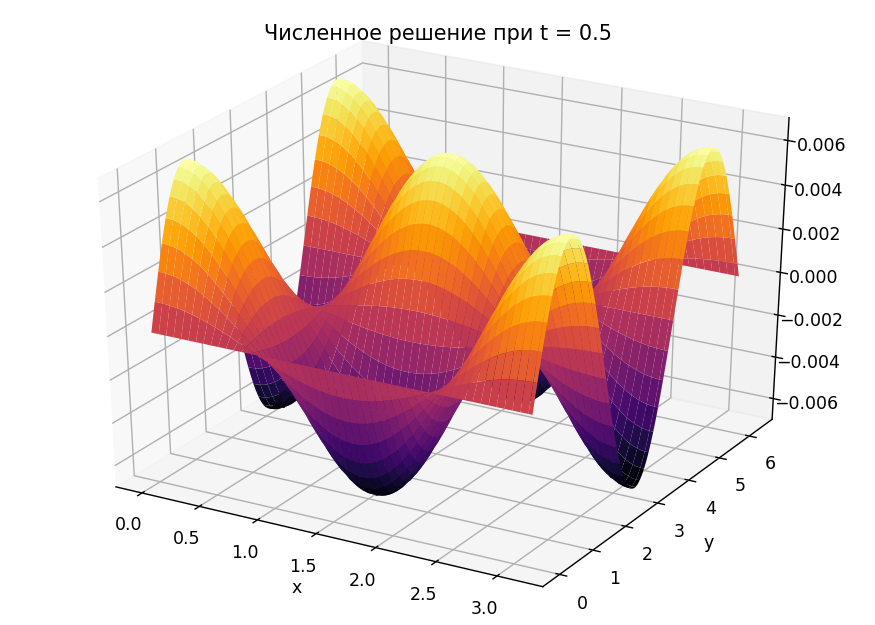

Text(0.5, 0.92, 'Численное решение при t = 0.5')

In [80]:
N, M, T = 100,100,100
x_start, x_end = 0, pi
y_start, y_end = 0, 2*pi
t_start, t_end = 0, 1

h_x=x_end/(N-1)
h_y=y_end/(M-2)
tau= t_end/ T
gamma_1 = tau / (h_x**2)
gamma_2 = tau / (h_y**2)

x = np.linspace(x_start,x_end,N)
y = np.linspace(y_start-h_y/2,y_end+h_y/2,M) 
t = np.linspace(t_start,t_end,T) 
u=np.zeros((N,M,2*T+1)) 

for n in range(0,N):              
    for m in range(0,M):
        u[n,m,0]=sin(3*x[n])*cos(y[m])
        
        
def progonka_X(m,j):
    alpha=np.zeros(N)        
    beta = np.zeros(N)
    alpha[1] = 0    
    beta[1] = 0
    A_x = 0.5 * gamma_1
    B_x = 1 + gamma_1
    C_x = 0.5 * gamma_1
    
    u[0,m,j]= 0
    for n in range (1,N-1): # прямая прогонка 
        F_x = 0.5 * gamma_2*(u[n,m-1,j-1]+u[n,m+1,j-1])+(1-gamma_2)*u[n,m,j-1]
        alpha[n+1] = C_x / (B_x - A_x * alpha[n])
        beta[n+1] = (F_x + A_x * beta[n]) / (B_x-A_x * alpha[n])

    u[N-1,m,j] = 0
    for n in range(N-1,0,-1):   # обратная прогонка               
        u[n-1,m,j]=alpha[n] * u[n,m,j] + beta[n] 
    
    
def progonka_Y(n,j):
    alpha=np.zeros(M)
    beta = np.zeros(M)
    alpha[1] = 1
    beta[1] = 0
    A_y = 0.5 * gamma_2
    B_y= 1 + gamma_2
    C_y= 0.5 * gamma_2
    for m in range (1,M-1): # прямая прогонка
        F_y = 0.5 *gamma_1*(u[n-1,m,j-1]+u[n+1,m,j-1])+(1-gamma_1)*u[n,m,j-1]
        alpha[m+1] = C_y / (B_y - A_y * alpha[m])  
        beta[m+1] = (F_y + A_y * beta[m]) / (B_y-A_y * alpha[m])
    
    u[n,M-1,j]=beta[-1]/(1-alpha[-1]) # обратная прогонка
    for m in range(M-1,0,-1):                  
        u[n,m-1,j]=alpha[m] * u[n,m,j] + beta[m]     
    

for j in range(1,2*T+1,2):
    for m in range(1,M-1):
        progonka_X(m,j)
    for n in range(1,N-1):
        progonka_Y(n,j+1)
    for m in range(0,M):
        u[0,m,j+1]=0
        u[N-1,m,j+1]=0
        
        
fig = plt.figure(figsize=(7,5))
ax = Axes3D(fig)
x1,y1 = np.meshgrid(x,y)
ax.plot_surface(x1, y1, u[:,:,int(T)], cmap = cm.inferno)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Численное решение при t = ' +str(round(tau*T/2,2)) + '')

<IPython.core.display.Javascript object>


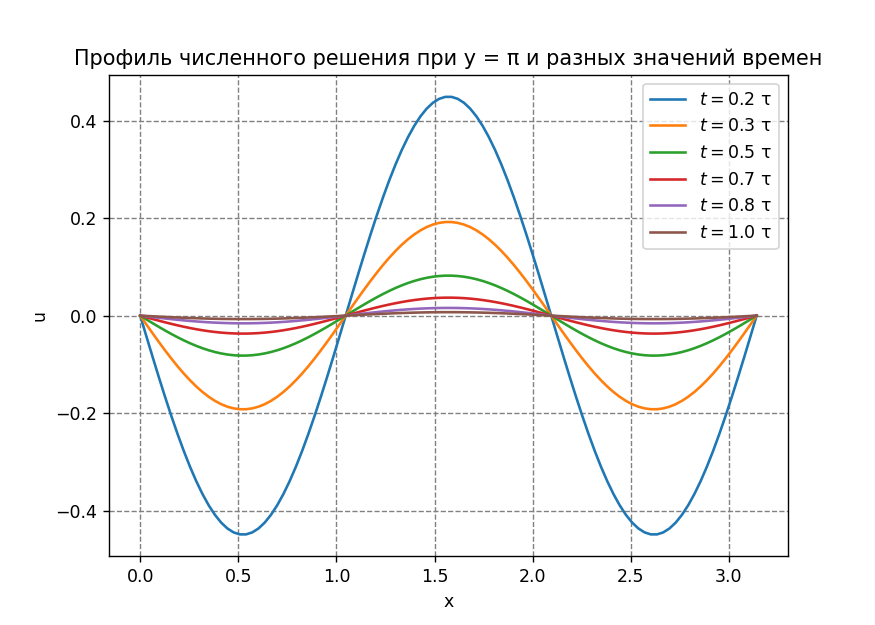

In [76]:
fig,ax=plt.subplots(figsize=(7,5))
x = np.linspace(x_start,x_end,N)
plt.xlabel('x')
plt.ylabel('u')
plt.title('Профиль численного решения при y = π и разных значений времен')

plt.plot(x, u[:,M//2,int(T/6)],label='$t=$' +str(round(tau*T/6,1)) + ' τ')
plt.plot(x, u[:,M//2,int(2*T/6)],label='$t= $' +str(round(tau*2*T/6,1)) + ' τ')
plt.plot(x, u[:,M//2,int(3*T/6)],label='$t= $' +str(round(tau*3*T/6,1)) + ' τ')
plt.plot(x, u[:,M//2,int(4*T/6)],label='$t= $' +str(round(tau*4*T/6,1)) + ' τ')
plt.plot(x, u[:,M//2,int(5*T/6)],label='$t= $' +str(round(tau*5*T/6,1)) + ' τ')
plt.plot(x, u[:,M//2,int(6*T/6)-1],label='$t= $' +str(round(tau*6*T/6,1)) + ' τ')
ax.grid(which='major', color = 'gray',ls='--')
ax.legend(loc='best')

<IPython.core.display.Javascript object>


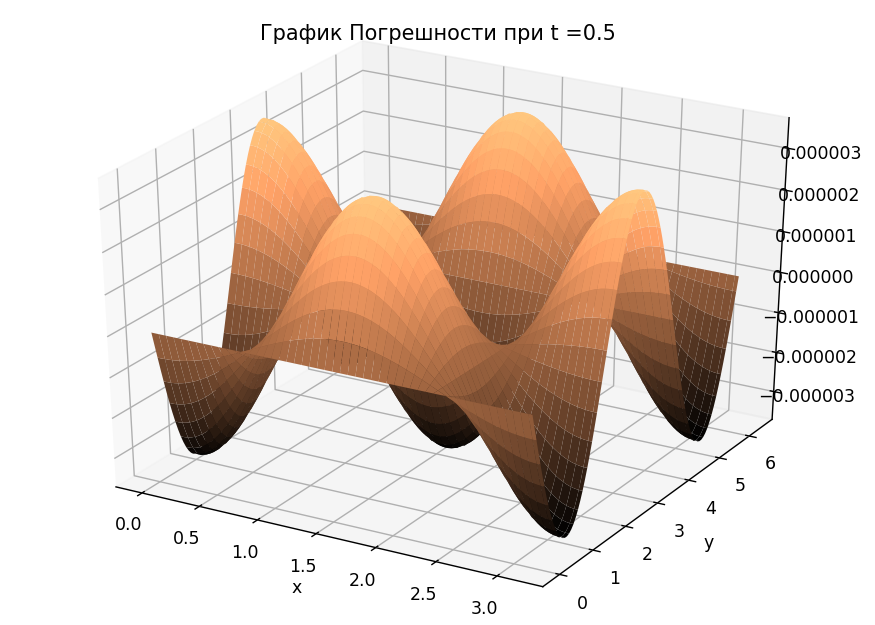

Text(0.5, 0.92, 'График Погрешности при t =0.5')

In [77]:
u_a = np.zeros((N,M,T))

for n in range(0,N):              
    for m in range(0,M):
        for j in range(0,T):
            u_a[n,m,j]=sin(3*x[n])*cos(y[m])*exp(-10*j*tau)


fig = plt.figure(figsize=(7,5))
ax = Axes3D(fig)
x1,y1 = np.meshgrid(x,y)
ax.plot_surface(x1, y1, u_a[:,:,int(T/2)]-u[:,:,int(T)], cmap = cm.copper)
plt.xlabel('x')
plt.ylabel('y')
plt.title('График Погрешности при t =' +str(round(tau*T/2,2)) + '')

### Проверка выполнения начального и граничного условий

In [84]:
print("Начальные условия:")

satisfied = True

for n in range(0,N):              
    for m in range(0,M):
        if u[n,m,0] - sin(3*x[n])*cos(y[m]) > 1e-10:
            satisfied = False
            print("Начальные условия не выполнены")

if satisfied:
    print("Начальные условия выполнены")
    
satisfied = True    
        
print("\nГраничные условия по x:")

for m in range(0,M):              
    for t in range(0,T):
        if u[0,m,t] - 0 > 1e-1 or u[N-1,m,t] - 0 > 1e-10:
            satisfied = False
            print("Граничные условия по x не выполнены")
            
if satisfied:
    print("Граничные условия по x выполнены")
    
satisfied = True

print("\nГраничные условия по y:")

for n in range(0,N):              
    for t in range(0,T):
        if (u[n,1,t] - u[n,0,t])/h_y - 0 > 1e-10 or (u[n,M-2,t] - u[n,M-1,t])/h_y - 0 > 1e-10:
            satisfied = False
            print("Граничные условия по y не выполнены")
            
if satisfied:
    print("Граничные условия по y выполнены")

Начальные условия:
Начальные условия выполнены

Граничные условия по x:
Граничные условия по x выполнены

Граничные условия по y:
Граничные условия по y выполнены


### Численное решение и погрешность при N, M, T = 50, 50, 50

<IPython.core.display.Javascript object>


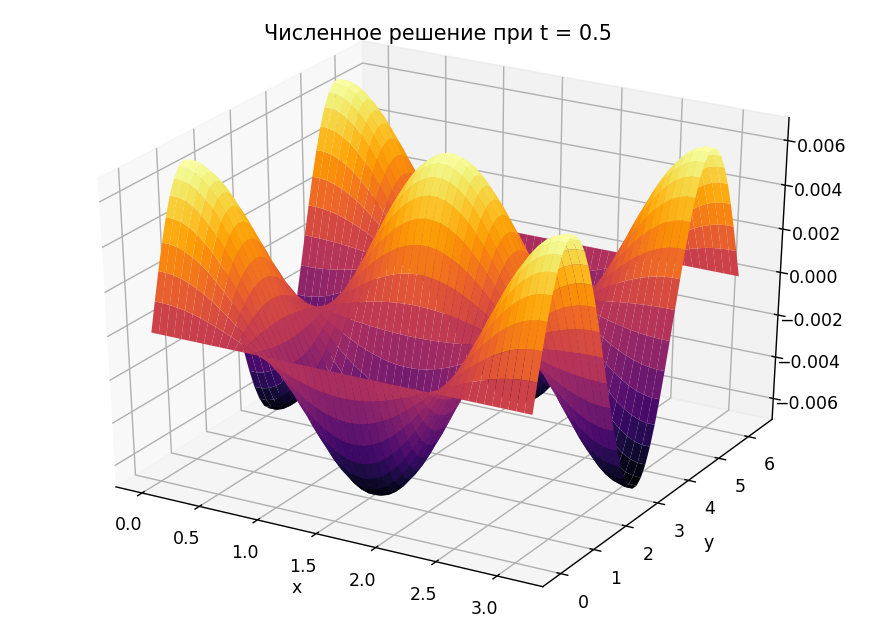

Text(0.5, 0.92, 'Численное решение при t = 0.5')

In [26]:
N, M, T = 50, 50, 50
x_start, x_end = 0, pi
y_start, y_end = 0, 2*pi
t_start, t_end = 0, 1

h_x=x_end/(N-1)
h_y=y_end/(M-2)
tau= t_end/ T
gamma_1 = tau / (h_x**2)
gamma_2 = tau / (h_y**2)

x = np.linspace(x_start,x_end,N)
y = np.linspace(y_start-h_y/2,y_end+h_y/2,M) 
t = np.linspace(t_start,t_end,T) 
u=np.zeros((N,M,2*T+1)) 

for n in range(0,N):              
    for m in range(0,M):
        u[n,m,0]=sin(3*x[n])*cos(y[m])
        
        
def progonka_X(m,j):
    alpha=np.zeros(N)        
    beta = np.zeros(N)
    alpha[1] = 0    
    beta[1] = 0
    A_x = 0.5 * gamma_1
    B_x = 1 + gamma_1
    C_x = 0.5 * gamma_1
    
    u[0,m,j]= 0
    for n in range (1,N-1): # прямая прогонка 
        F_x = 0.5 * gamma_2*(u[n,m-1,j-1]+u[n,m+1,j-1])+(1-gamma_2)*u[n,m,j-1]
        alpha[n+1] = C_x / (B_x - A_x * alpha[n])
        beta[n+1] = (F_x + A_x * beta[n]) / (B_x-A_x * alpha[n])

    u[N-1,m,j] = 0
    for n in range(N-1,0,-1):   # обратная прогонка               
        u[n-1,m,j]=alpha[n] * u[n,m,j] + beta[n] 
    
    
def progonka_Y(n,j):
    alpha=np.zeros(M)
    beta = np.zeros(M)
    alpha[1] = 1
    beta[1] = 0
    A_y = 0.5 * gamma_2
    B_y= 1 + gamma_2
    C_y= 0.5 * gamma_2
    for m in range (1,M-1): # прямая прогонка
        F_y = 0.5 *gamma_1*(u[n-1,m,j-1]+u[n+1,m,j-1])+(1-gamma_1)*u[n,m,j-1]
        alpha[m+1] = C_y / (B_y - A_y * alpha[m])  
        beta[m+1] = (F_y + A_y * beta[m]) / (B_y-A_y * alpha[m])
    
    u[n,M-1,j]=beta[-1]/(1-alpha[-1]) # обратная прогонка
    for m in range(M-1,0,-1):                  
        u[n,m-1,j]=alpha[m] * u[n,m,j] + beta[m]     
    

for j in range(1,2*T+1,2):
    for m in range(1,M-1):
        progonka_X(m,j)
    for n in range(1,N-1):
        progonka_Y(n,j+1)
    for m in range(0,M):
        u[0,m,j+1]=0
        u[N-1,m,j+1]=0
        
        
fig = plt.figure(figsize=(7,5))
ax = Axes3D(fig)
x1,y1 = np.meshgrid(x,y)
ax.plot_surface(x1, y1, u[:,:,int(T)], cmap = cm.inferno)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Численное решение при t = ' +str(round(tau*T/2,2)) + '')

<IPython.core.display.Javascript object>


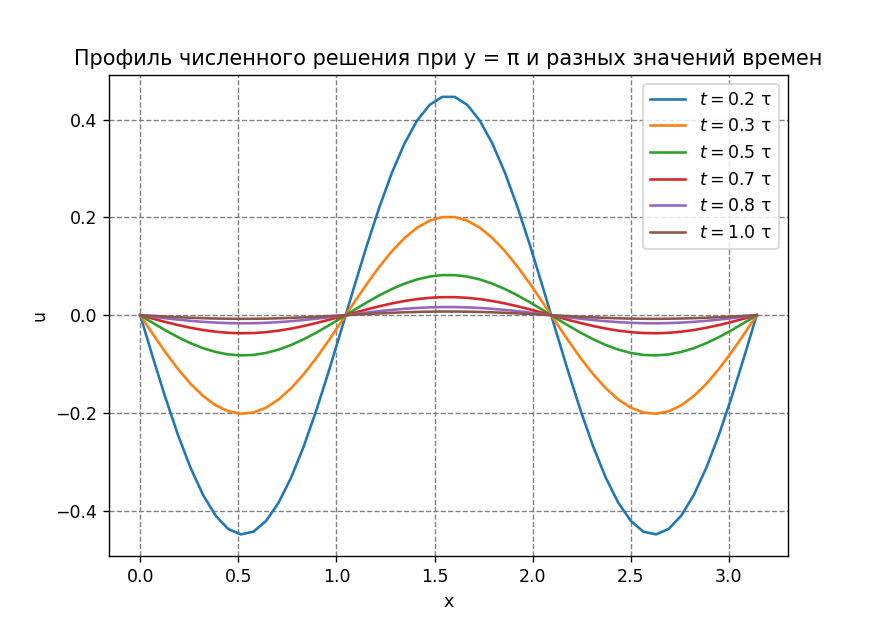

In [27]:
fig,ax=plt.subplots(figsize=(7,5))
x = np.linspace(x_start,x_end,N)
plt.xlabel('x')
plt.ylabel('u')
plt.title('Профиль численного решения при y = π и разных значений времен')

plt.plot(x, u[:,M//2,int(T/6)],label='$t=$' +str(round(tau*T/6,1)) + ' τ')
plt.plot(x, u[:,M//2,int(2*T/6)],label='$t= $' +str(round(tau*2*T/6,1)) + ' τ')
plt.plot(x, u[:,M//2,int(3*T/6)],label='$t= $' +str(round(tau*3*T/6,1)) + ' τ')
plt.plot(x, u[:,M//2,int(4*T/6)],label='$t= $' +str(round(tau*4*T/6,1)) + ' τ')
plt.plot(x, u[:,M//2,int(5*T/6)],label='$t= $' +str(round(tau*5*T/6,1)) + ' τ')
plt.plot(x, u[:,M//2,int(6*T/6)-1],label='$t= $' +str(round(tau*6*T/6,1)) + ' τ')
ax.grid(which='major', color = 'gray',ls='--')
ax.legend(loc='best')

<IPython.core.display.Javascript object>


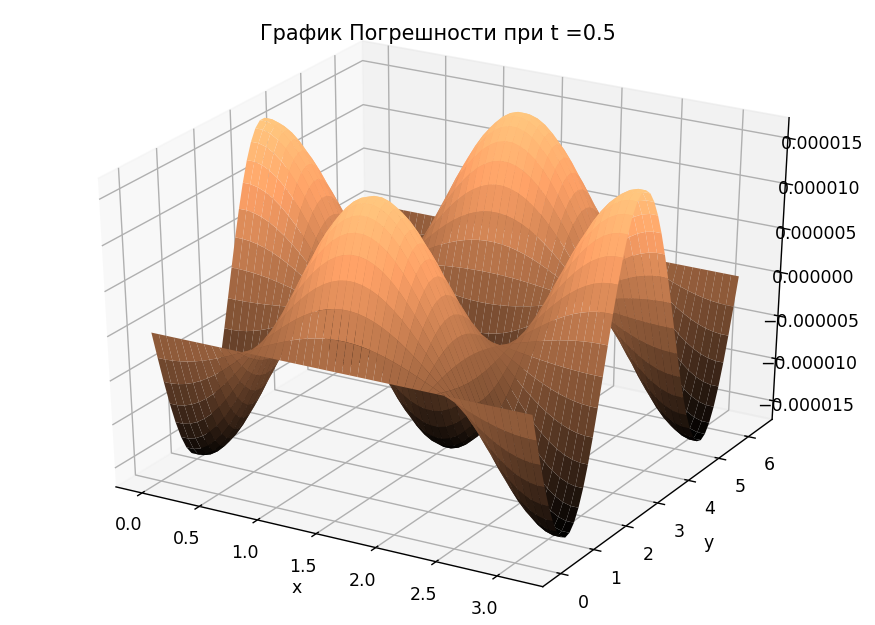

Text(0.5, 0.92, 'График Погрешности при t =0.5')

In [28]:
u_a = np.zeros((N,M,T))

for n in range(0,N):              
    for m in range(0,M):
        for j in range(0,T):
            u_a[n,m,j]=sin(3*x[n])*cos(y[m])*exp(-10*j*tau)

fig = plt.figure(figsize=(7,5))
ax = Axes3D(fig)
x1,y1 = np.meshgrid(x,y)
ax.plot_surface(x1, y1, u_a[:,:,int(T/2)]-u[:,:,int(T)], cmap = cm.copper)
plt.xlabel('x')
plt.ylabel('y')
plt.title('График Погрешности при t =' +str(round(tau*T/2,2)) + '')

### Численное решение и погрешность при N, M, T = 26, 26, 26

<IPython.core.display.Javascript object>


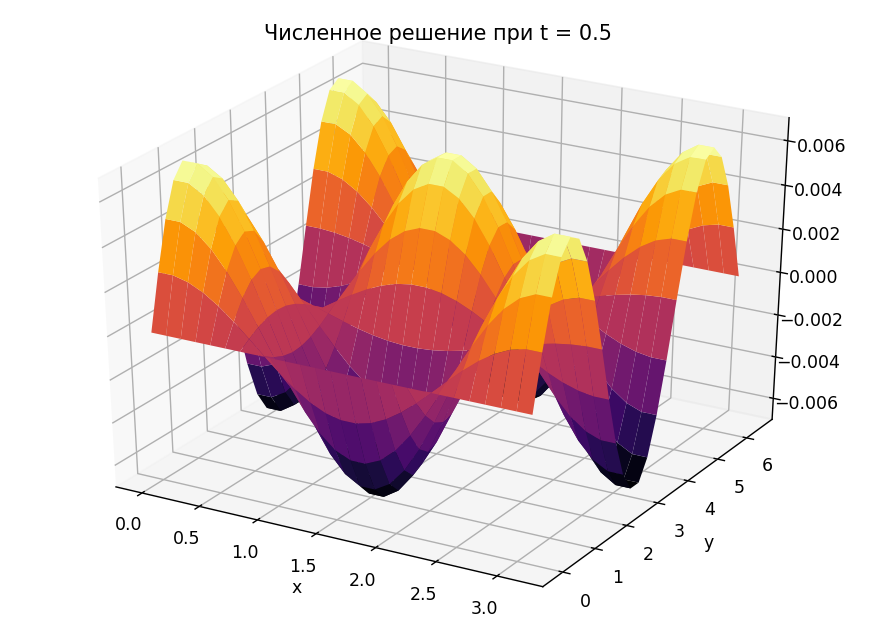

Text(0.5, 0.92, 'Численное решение при t = 0.5')

In [69]:
N, M, T = 26,26,26
x_start, x_end = 0, pi
y_start, y_end = 0, 2*pi
t_start, t_end = 0, 1

h_x=x_end/(N-1)
h_y=y_end/(M-2)
tau= t_end/ T
gamma_1 = tau / (h_x**2)
gamma_2 = tau / (h_y**2)

x = np.linspace(x_start,x_end,N)
y = np.linspace(y_start-h_y/2,y_end+h_y/2,M) 
t = np.linspace(t_start,t_end,T) 
u=np.zeros((N,M,2*T+1)) 

for n in range(0,N):              
    for m in range(0,M):
        u[n,m,0]=sin(3*x[n])*cos(y[m])
        
        
def progonka_X(m,j):
    alpha=np.zeros(N)        
    beta = np.zeros(N)
    alpha[1] = 0    
    beta[1] = 0
    A_x = 0.5 * gamma_1
    B_x = 1 + gamma_1
    C_x = 0.5 * gamma_1
    
    u[0,m,j]= 0
    for n in range (1,N-1): # прямая прогонка 
        F_x = 0.5 * gamma_2*(u[n,m-1,j-1]+u[n,m+1,j-1])+(1-gamma_2)*u[n,m,j-1]
        alpha[n+1] = C_x / (B_x - A_x * alpha[n])
        beta[n+1] = (F_x + A_x * beta[n]) / (B_x-A_x * alpha[n])

    u[N-1,m,j] = 0
    for n in range(N-1,0,-1):   # обратная прогонка               
        u[n-1,m,j]=alpha[n] * u[n,m,j] + beta[n] 
    
    
def progonka_Y(n,j):
    alpha=np.zeros(M)
    beta = np.zeros(M)
    alpha[1] = 1
    beta[1] = 0
    A_y = 0.5 * gamma_2
    B_y= 1 + gamma_2
    C_y= 0.5 * gamma_2
    for m in range (1,M-1): # прямая прогонка
        F_y = 0.5 *gamma_1*(u[n-1,m,j-1]+u[n+1,m,j-1])+(1-gamma_1)*u[n,m,j-1]
        alpha[m+1] = C_y / (B_y - A_y * alpha[m])  
        beta[m+1] = (F_y + A_y * beta[m]) / (B_y-A_y * alpha[m])
    
    u[n,M-1,j]=beta[-1]/(1-alpha[-1]) # обратная прогонка
    for m in range(M-1,0,-1):                  
        u[n,m-1,j]=alpha[m] * u[n,m,j] + beta[m]     
    

for j in range(1,2*T+1,2):
    for m in range(1,M-1):
        progonka_X(m,j)
    for n in range(1,N-1):
        progonka_Y(n,j+1)
    for m in range(0,M):
        u[0,m,j+1]=0
        u[N-1,m,j+1]=0
        
        
fig = plt.figure(figsize=(7,5))
ax = Axes3D(fig)
x1,y1 = np.meshgrid(x,y)
ax.plot_surface(x1, y1, u[:,:,int(T)], cmap = cm.inferno)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Численное решение при t = ' +str(round(tau*T/2,2)) + '')

<IPython.core.display.Javascript object>


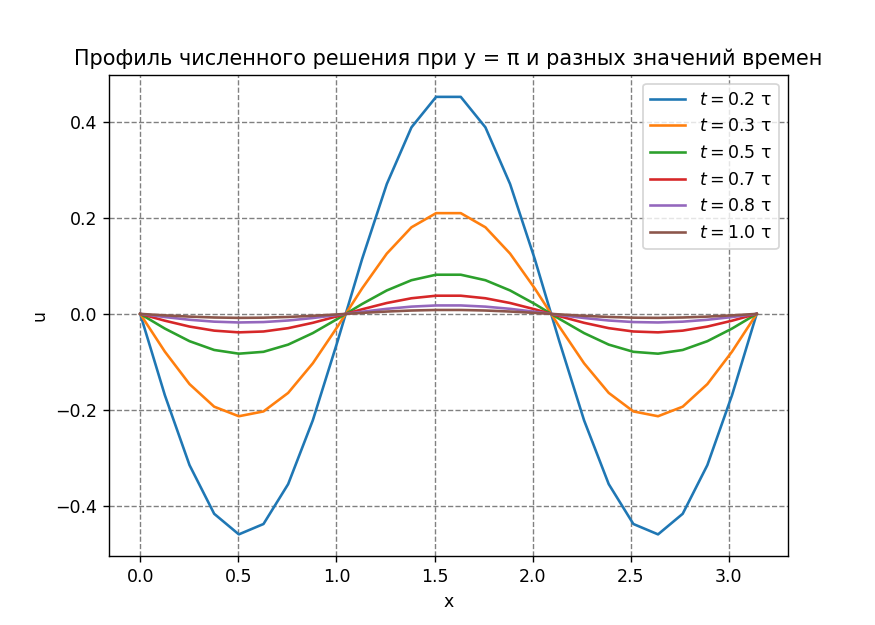

In [70]:
fig,ax=plt.subplots(figsize=(7,5))
x = np.linspace(x_start,x_end,N)
plt.xlabel('x')
plt.ylabel('u')
plt.title('Профиль численного решения при y = π и разных значений времен')

plt.plot(x, u[:,M//2,int(T/6)],label='$t=$' +str(round(tau*T/6,1)) + ' τ')
plt.plot(x, u[:,M//2,int(2*T/6)],label='$t= $' +str(round(tau*2*T/6,1)) + ' τ')
plt.plot(x, u[:,M//2,int(3*T/6)],label='$t= $' +str(round(tau*3*T/6,1)) + ' τ')
plt.plot(x, u[:,M//2,int(4*T/6)],label='$t= $' +str(round(tau*4*T/6,1)) + ' τ')
plt.plot(x, u[:,M//2,int(5*T/6)],label='$t= $' +str(round(tau*5*T/6,1)) + ' τ')
plt.plot(x, u[:,M//2,int(6*T/6)-1],label='$t= $' +str(round(tau*6*T/6,1)) + ' τ')
ax.grid(which='major', color = 'gray',ls='--')
ax.legend(loc='best')

<IPython.core.display.Javascript object>


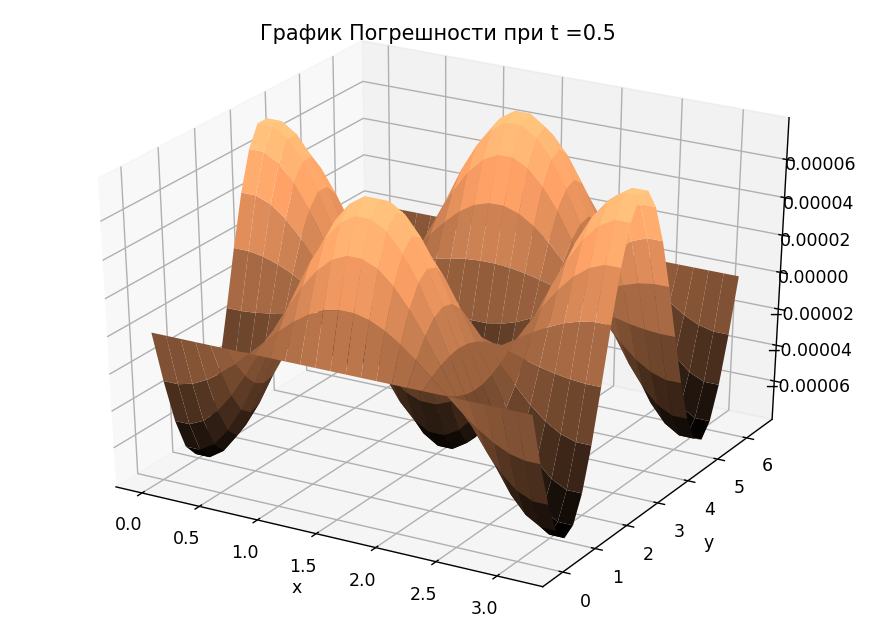

Text(0.5, 0.92, 'График Погрешности при t =0.5')

In [71]:
u_a = np.zeros((N,M,T))

for n in range(0,N):              
    for m in range(0,M):
        for j in range(0,T):
            u_a[n,m,j]=sin(3*x[n])*cos(y[m])*exp(-10*j*tau)

fig = plt.figure(figsize=(7,5))
ax = Axes3D(fig)
x1,y1 = np.meshgrid(x,y)
ax.plot_surface(x1, y1, u_a[:,:,int(T/2)]-u[:,:,int(T)], cmap = cm.copper)
plt.xlabel('x')
plt.ylabel('y')
plt.title('График Погрешности при t =' +str(round(tau*T/2,2)) + '')

Максимальная погрешность при количестве шагов 100, 50 и 25 составила 0.00006, 0.000015, 0.000003 соответственно. С увеличением количества шагов она убывает квадратично, что соответствует порядку аппроксимации схемы переменных направлений $O(h^2_x + h^2_y + τ^2)$
